<a href="https://colab.research.google.com/github/venkat299/DA-5401-Data-Analytics-Laboratory/blob/main/notebookweek-9-assignment/c9a1629ca2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

visual_taxonomy_path = kagglehub.competition_download('visual-taxonomy')

print('Data source import complete.')


100%|██████████| 3.52G/3.52G [00:33<00:00, 112MB/s] 

Extracting files...


Data source import complete.


In [9]:
!pwd
!ls
print(visual_taxonomy_path)

/content
sample_data
/root/.cache/kagglehub/competitions/visual-taxonomy


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import shutil
import os

# Assuming 'visual_taxonomy_path' holds the path to the downloaded dataset
source_path = visual_taxonomy_path
destination_path = os.path.join('/kaggle/working', 'visual-taxonomy')

# Copy the dataset to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/visual-taxonomy'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk(destination_path):

    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
!ls /kaggle/working/visual-taxonomy

category_attributes.parquet  sample_submission.csv  test.csv  test_images  train.csv  train_images


In [17]:
import pandas as pd
import os

# Specify the path to your Parquet file
data_path = '/kaggle/working/visual-taxonomy'
file_path = os.path.join(data_path, 'category_attributes.parquet')
df = pd.read_parquet(file_path)
df

Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                      Attribute_list  
0  [color, neck, pattern, print_or_pattern_type, ...  
1  [blouse_pattern, border, border_width, color, ...  
2  [color, fit_shape, length, occasion, ornamenta...  
3  [color, fit_shape, length, pattern, print_or_p...  
4  [color, fit_shape, length, neck_collar, ocassi...

In [19]:
category_attribute_list = []
for index, row in df.iterrows():
  category = row['Category']
  attributes = row['Attribute_list']
  category_attribute_list.extend([(category, attr) for attr in attributes[:2]]) # Taking only the first two attributes

print(category_attribute_list)

[('Men Tshirts', 'color'), ('Men Tshirts', 'neck'), ('Sarees', 'blouse_pattern'), ('Sarees', 'border'), ('Kurtis', 'color'), ('Kurtis', 'fit_shape'), ('Women Tshirts', 'color'), ('Women Tshirts', 'fit_shape'), ('Women Tops & Tunics', 'color'), ('Women Tops & Tunics', 'fit_shape')]


In [ ]:

basket = category_attribute_list
basket = [('Men Tshirts', 'color'),
 ('Men Tshirts', 'neck'),
 ('Sarees', 'blouse_pattern'),
 ('Sarees', 'border'),
 ('Kurtis', 'color'),
 ('Kurtis', 'fit_shape'),
 ('Women Tshirts', 'color'),
 ('Women Tshirts', 'fit_shape'),
 ('Women Tops & Tunics', 'color'),
 ('Women Tops & Tunics', 'fit_shape')]

basket

In [20]:

# data_path = '/kaggle/working/visual-taxonomy'
file_path = os.path.join(data_path, 'train.csv')
train = pd.read_csv(file_path)
train

id             Category  len      attr_1   attr_2   attr_3  \
0          0          Men Tshirts    5     default    round  printed   
1          1          Men Tshirts    5  multicolor     polo    solid   
2          2          Men Tshirts    5     default     polo    solid   
3          3          Men Tshirts    5  multicolor     polo    solid   
4          4          Men Tshirts    5  multicolor     polo    solid   
...      ...                  ...  ...         ...      ...      ...   
70208  70374  Women Tops & Tunics   10  multicolor   fitted  regular   
70209  70375  Women Tops & Tunics   10      yellow  regular     crop   
70210  70376  Women Tops & Tunics   10      maroon   fitted     crop   
70211  70377  Women Tops & Tunics   10         NaN      NaN      NaN   
70212  70378  Women Tops & Tunics   10        pink     boxy     crop   

            attr_4         attr_5   attr_6      attr_7         attr_8  \
0          default  short sleeves      NaN         NaN            NaN   
1            solid  short sleeves      NaN         NaN            NaN   
2            solid  short sleeves      NaN         NaN            NaN   
3            solid  short sleeves      NaN         NaN            NaN   
4            solid  short sleeves      NaN         NaN            NaN   
...            ...            ...      ...         ...            ...   
70208  square neck         casual  printed     default  short sleeves   
70209   round neck         casual  default     default  short sleeves   
70210   round neck         casual    solid       solid  short sleeves   
70211         high            NaN      NaN         NaN  short sleeves   
70212       v-neck         casual  printed  typography  short sleeves   

                attr_9  attr_10  
0                  NaN      NaN  
1                  NaN      NaN  
2                  NaN      NaN  
3                  NaN      NaN  
4                  NaN      NaN  
...                ...      ...  
70208  regular sleeves  ruffles  
70209  regular sleeves  knitted  
70210  regular sleeves  knitted  
70211              NaN      NaN  
70212  regular sleeves      NaN  

[70213 rows x 13 columns]

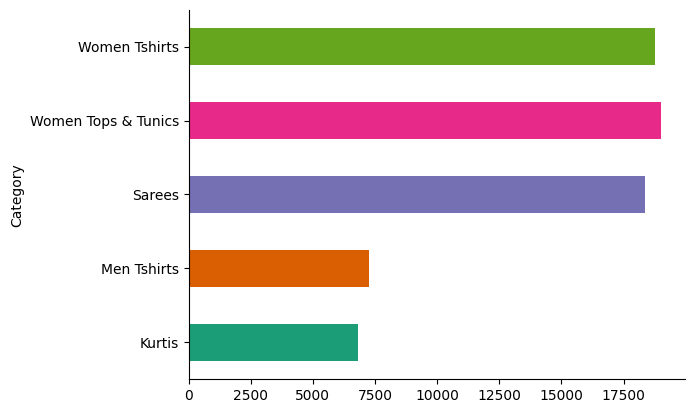

In [21]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
basket = [('Men Tshirts', 'attr_1'),
 ('Men Tshirts', 'attr_2'),
 ('Sarees', 'attr_2'),
 ('Sarees', 'attr_3'),
 ('Kurtis', 'attr_2'),
 ('Kurtis', 'attr_3'),
 ('Women Tshirts', 'attr_2'),
 ('Women Tshirts', 'attr_3'),
 ('Women Tops & Tunics', 'attr_2'),
 ('Women Tops & Tunics', 'attr_3')]

In [25]:
filtered_dfs = []
for category, column in basket:
  # Filter by category
  category_df = train[train['Category'] == category]
  # Drop NaN values in the specified column
  filtered_df = category_df.dropna(subset=[column])
  filtered_dfs.append(filtered_df)

filtered_dfs

[        id     Category  len      attr_1 attr_2   attr_3   attr_4  \
 0        0  Men Tshirts    5     default  round  printed  default   
 1        1  Men Tshirts    5  multicolor   polo    solid    solid   
 2        2  Men Tshirts    5     default   polo    solid    solid   
 3        3  Men Tshirts    5  multicolor   polo    solid    solid   
 4        4  Men Tshirts    5  multicolor   polo    solid    solid   
 ...    ...          ...  ...         ...    ...      ...      ...   
 6872  6878  Men Tshirts    5       black  round      NaN      NaN   
 6882  6888  Men Tshirts    5       black    NaN      NaN      NaN   
 6888  6894  Men Tshirts    5  multicolor    NaN      NaN      NaN   
 6891  6897  Men Tshirts    5       white    NaN      NaN      NaN   
 6894  6900  Men Tshirts    5       white  round      NaN      NaN   
 
              attr_5 attr_6 attr_7 attr_8 attr_9 attr_10  
 0     short sleeves    NaN    NaN    NaN    NaN     NaN  
 1     short sleeves    NaN    NaN    Na

In [26]:
sampled_dfs = []
for df, (category, column) in zip(filtered_dfs, basket):
  # Use stratified sampling
  sampled_df = df.groupby(column, group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))
  sampled_dfs.append(sampled_df)

<ipython-input-26-0b2b782ed9a6>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(column, group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))
<ipython-input-26-0b2b782ed9a6>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(column, group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))
<ipython-input-26-0b2b782e

In [28]:
# sampled_dfs

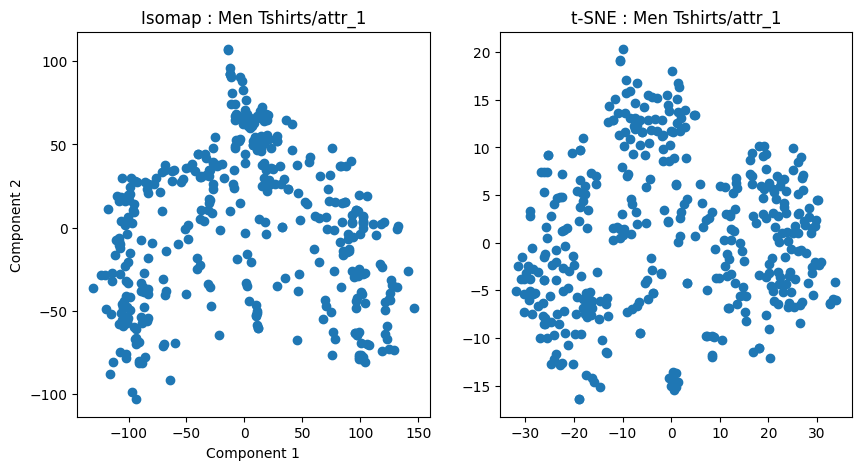

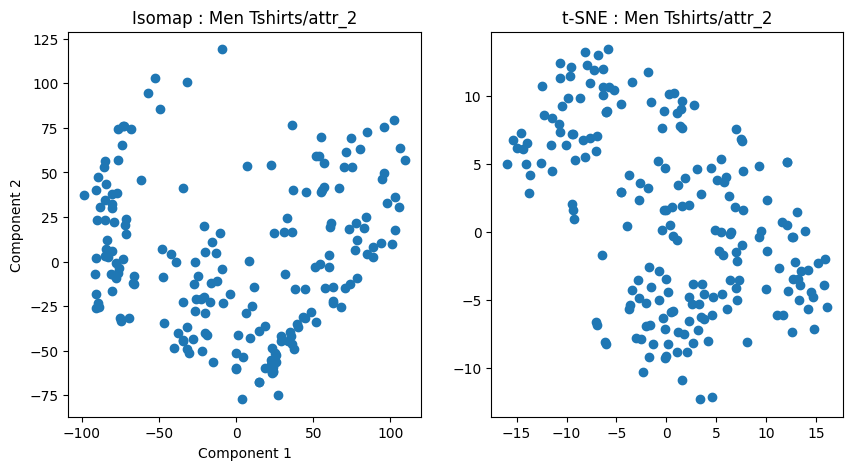

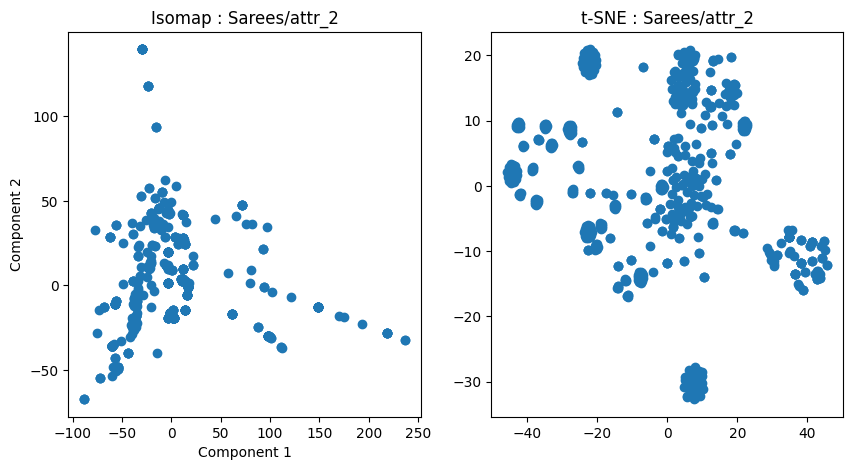

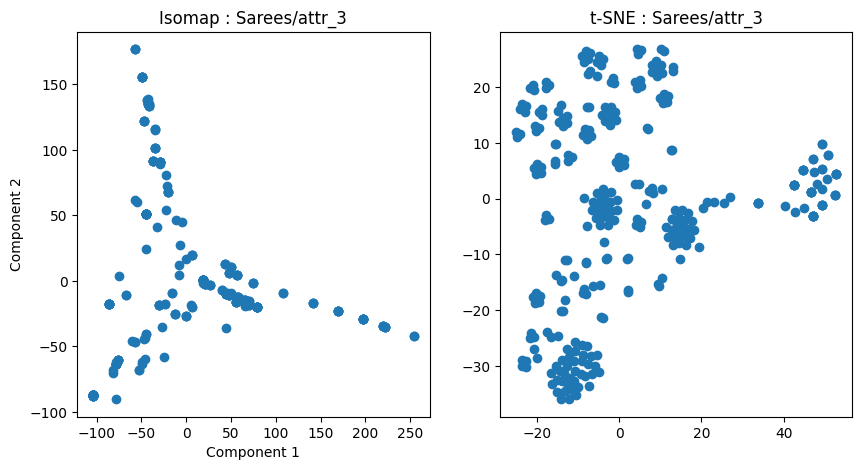

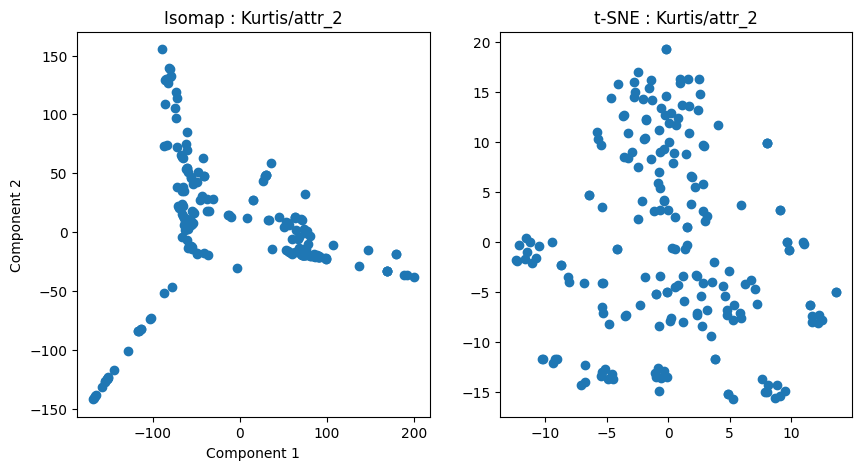

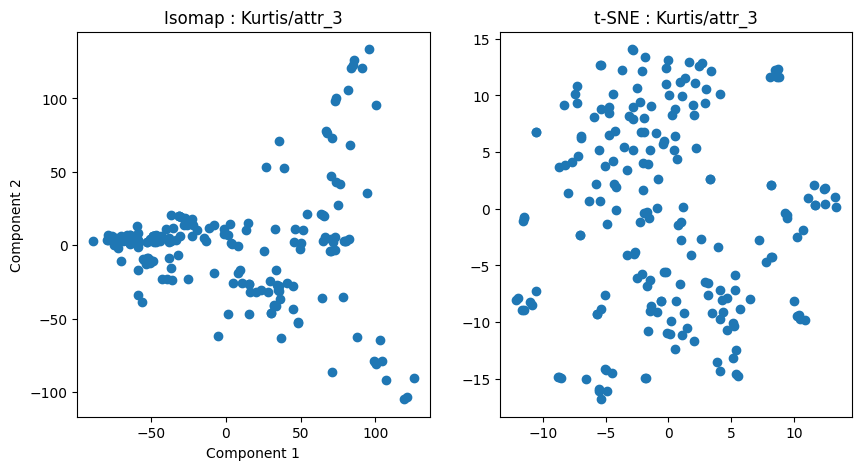

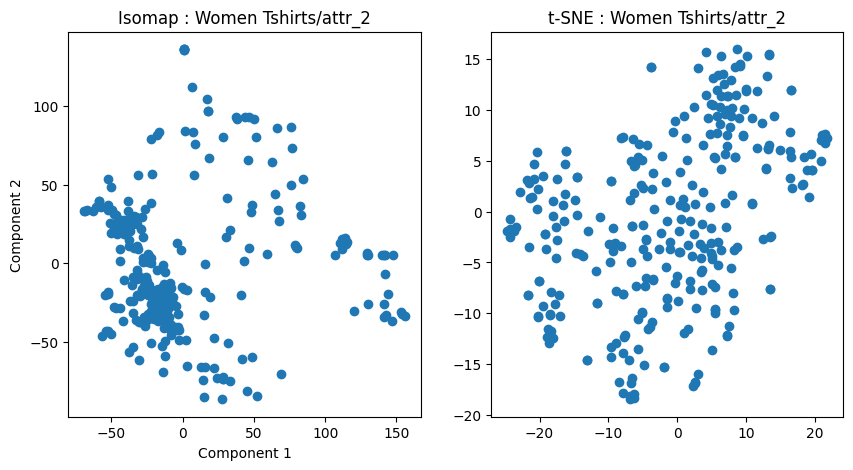

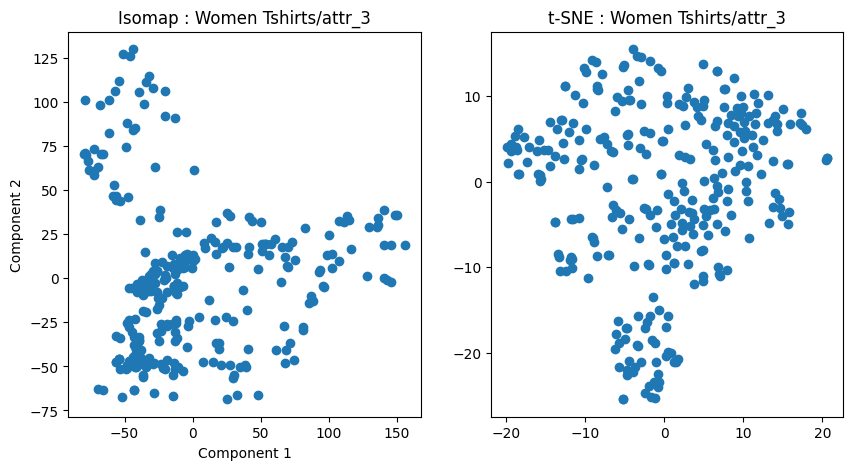

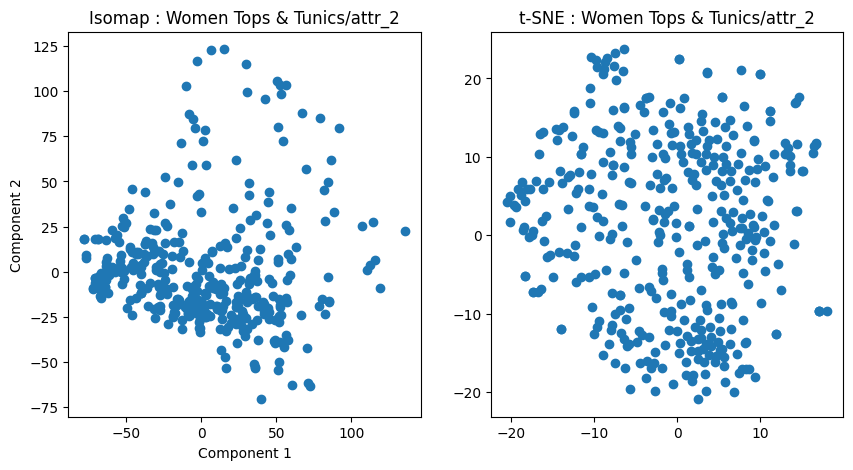

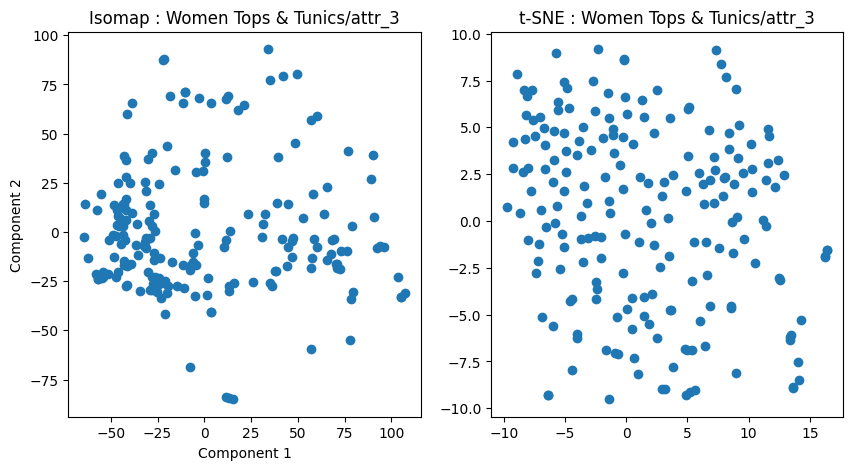

In [42]:
import warnings
#from sklearn.exceptions import SparseEfficiencyWarning, DataConversionWarning # This line is causing the error


# Instead of importing SparseEfficiencyWarning, import EfficiencyWarning
from sklearn.exceptions import DataConversionWarning, EfficiencyWarning

# Filter warnings related to DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Filter warnings related to EfficiencyWarning
warnings.filterwarnings(action='ignore', category=EfficiencyWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from scipy.sparse import SparseEfficiencyWarning #Add this import to use the warning category
warnings.filterwarnings('ignore', category=SparseEfficiencyWarning) # Add this line back to filter the warning.
warnings.filterwarnings('ignore', category=UserWarning) #Keep this line to ignore UserWarning
#


import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, TSNE
from PIL import Image
import numpy as np

def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        img = img.resize((64, 64))  # Resize images for efficiency
        img_array = np.array(img)
        # Normalize pixel values if needed
        img_array = img_array / 255.0
        return img_array.flatten()  # Flatten the image into a 1D array
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None


for sampled_df , (category, column) in zip(sampled_dfs, basket):
    image_data = []
    image_ids = []
    for _, item in sampled_df.iterrows():
        image_id = item['id']  # Replace with the actual column name for image IDs
        formatted_id = f"{int(image_id):06d}"  # Format the ID to have leading zeros
        image_path = f"/kaggle/working/visual-taxonomy/train_images/{formatted_id}.jpg" # Construct image path correctly

        # Load and preprocess the image
        image_array = load_and_preprocess_image(image_path)

        if image_array is not None:
            image_data.append(image_array)
            image_ids.append(image_id)

    if not image_data:  # Skip if no valid images found
        print("No valid images found for this dataframe. Skipping...")
        continue

    image_data = np.array(image_data)

    # Apply Isomap
    isomap = Isomap(n_components=2)
    isomap_result = isomap.fit_transform(image_data)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)  # Set random_state for reproducibility
    tsne_result = tsne.fit_transform(image_data)

    # Plotting (optional)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(isomap_result[:, 0], isomap_result[:, 1])
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(f'Isomap : {category}/{column}')

    plt.subplot(1, 2, 2)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
    plt.title(f't-SNE : {category}/{column}')
    plt.show()

In [43]:
from matplotlib import offsetbox

def visualize_embeddings(embedding_data, dimensionality_reduction_model, image_data=None, axes=None,
                    thumbnail_fraction=0.05, color_map='gray'):
    axes = axes or plt.gca()

    embeddings = dimensionality_reduction_model.fit_transform(embedding_data)
    axes.plot(embeddings[:, 0], embeddings[:, 1], '.k')

    if image_data is not None:
        minimum_distance_squared = (thumbnail_fraction * max(embeddings.max(0) - embeddings.min(0))) ** 2
        displayed_images = np.array([2 * embeddings.max(0)])
        for index in range(embedding_data.shape[0]):
            distance = np.sum((embeddings[index] - displayed_images) ** 2, 1)
            if np.min(distance) < minimum_distance_squared:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, embeddings[index]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(image_data[index], cmap=color_map),
                                      embeddings[index])
            axes.add_artist(imagebox)

In [45]:
def resize_image(image_id, image_directory='/content/train_images'):
    """
    Loads an image by ID, resizes it, and returns it as a PIL Image object.

    Args:
        image_id: The ID of the image to load.
        image_directory: The directory containing the images.

    Returns:
        A PIL Image object if successful, otherwise None.
    """
    formatted_image_id = f"{int(image_id):06d}"
    image_path = f'{image_directory}/{formatted_image_id}.jpg'

    try:
        image = Image.open(image_path)
        resized_image = image.resize((64, 64))
        return resized_image
    except FileNotFoundError:
        print(f"Image not found for ID: {formatted_image_id} at path: {image_path}")
        return None

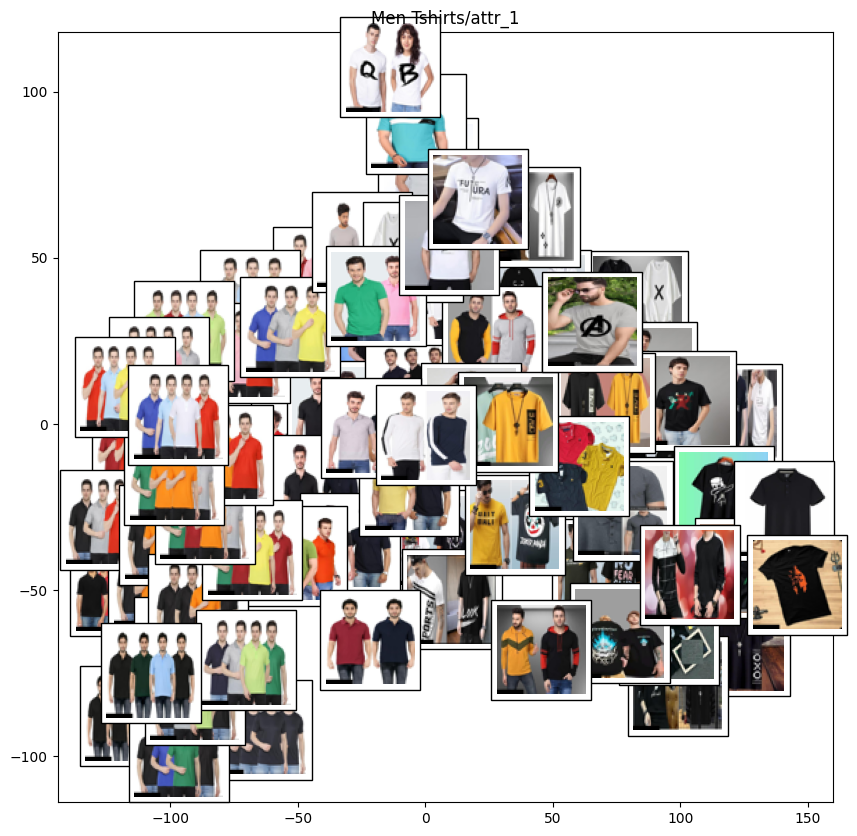

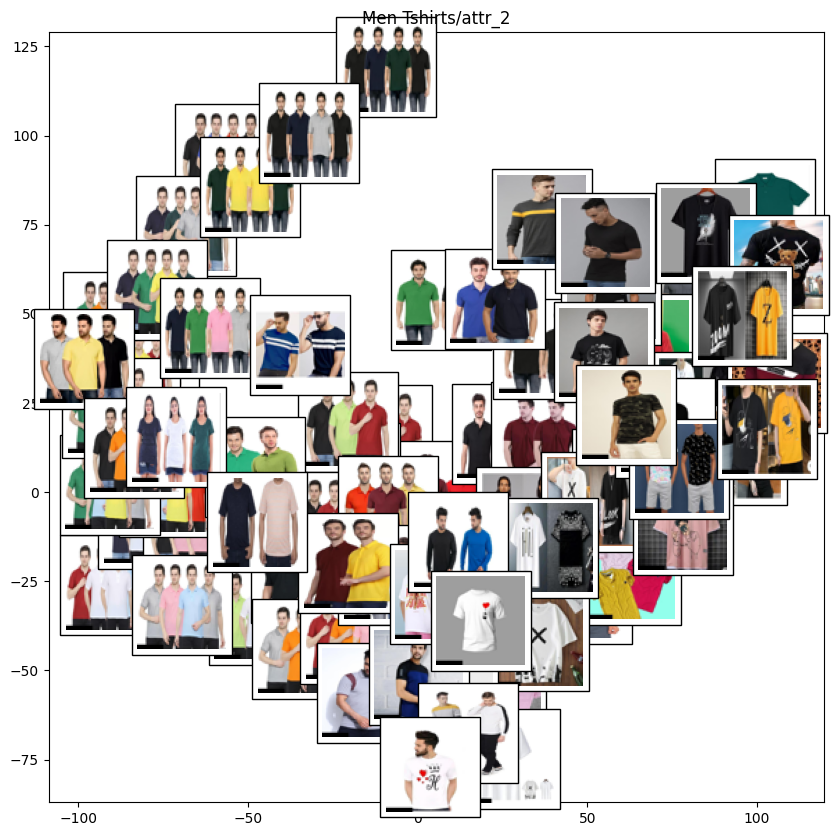

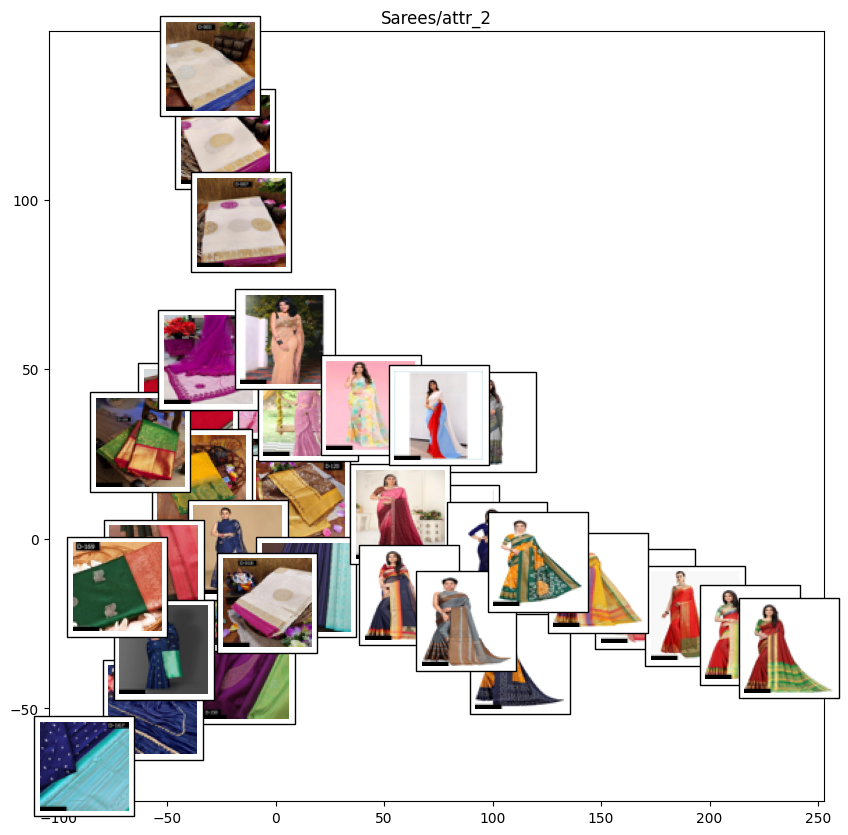

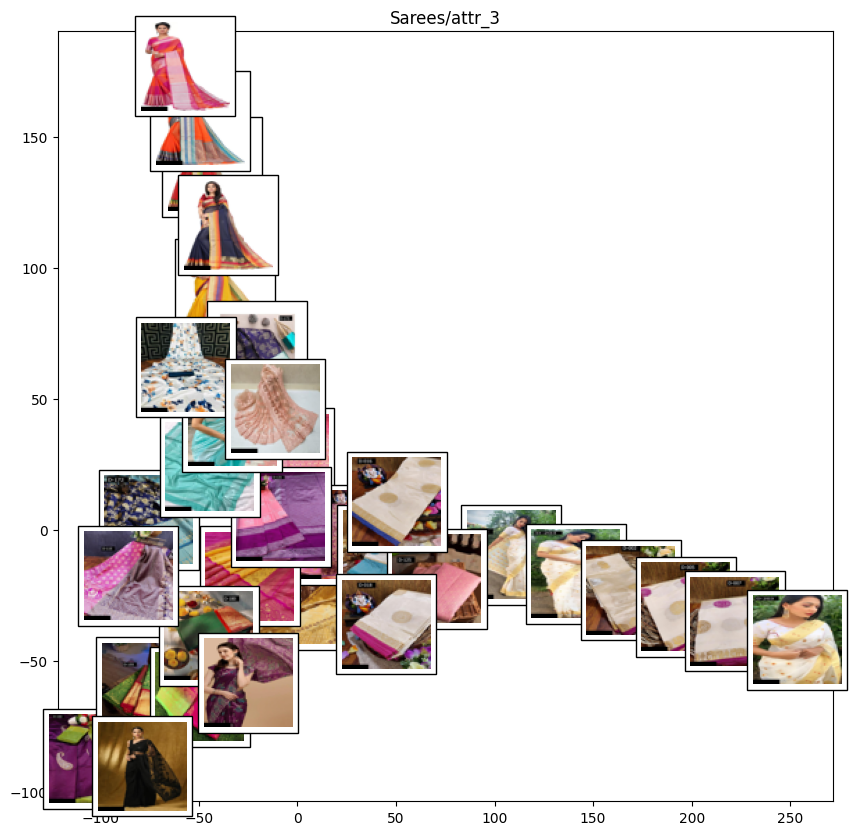

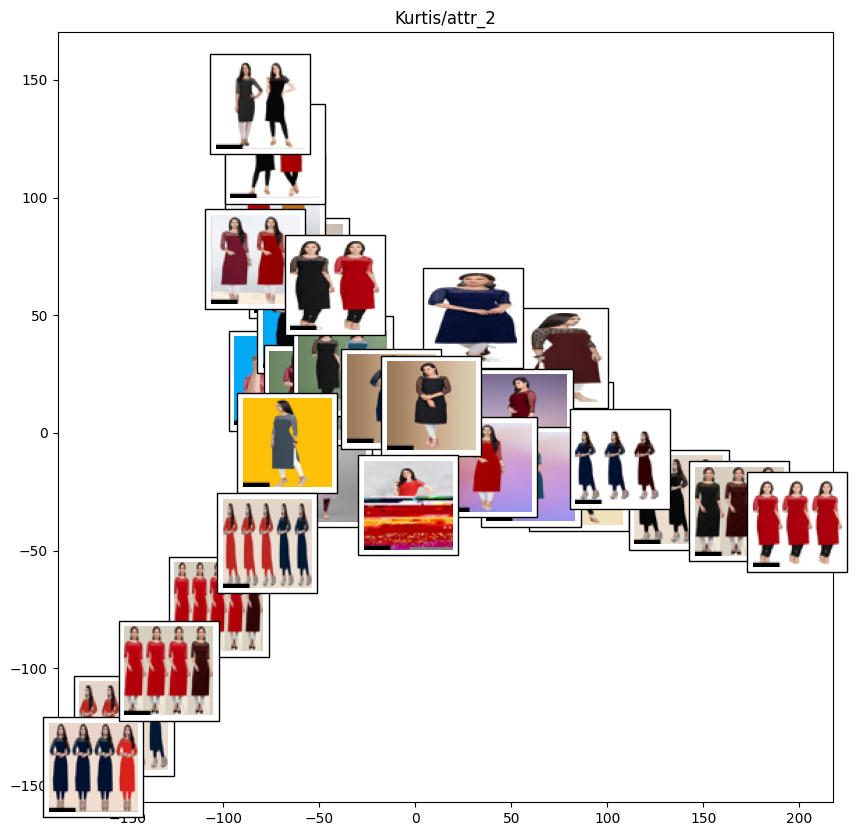

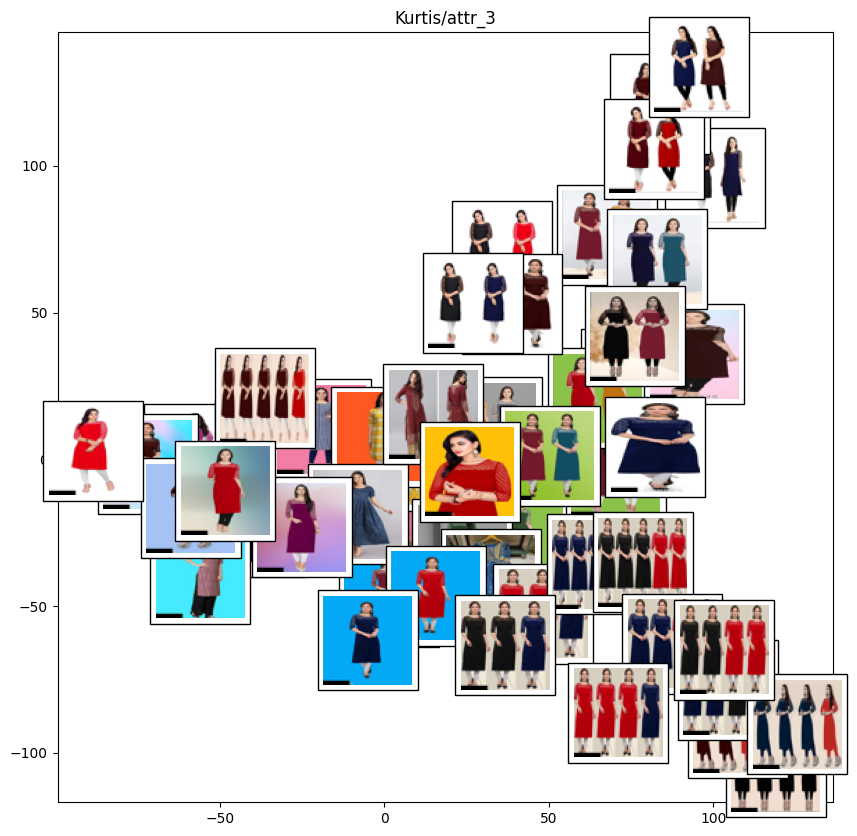

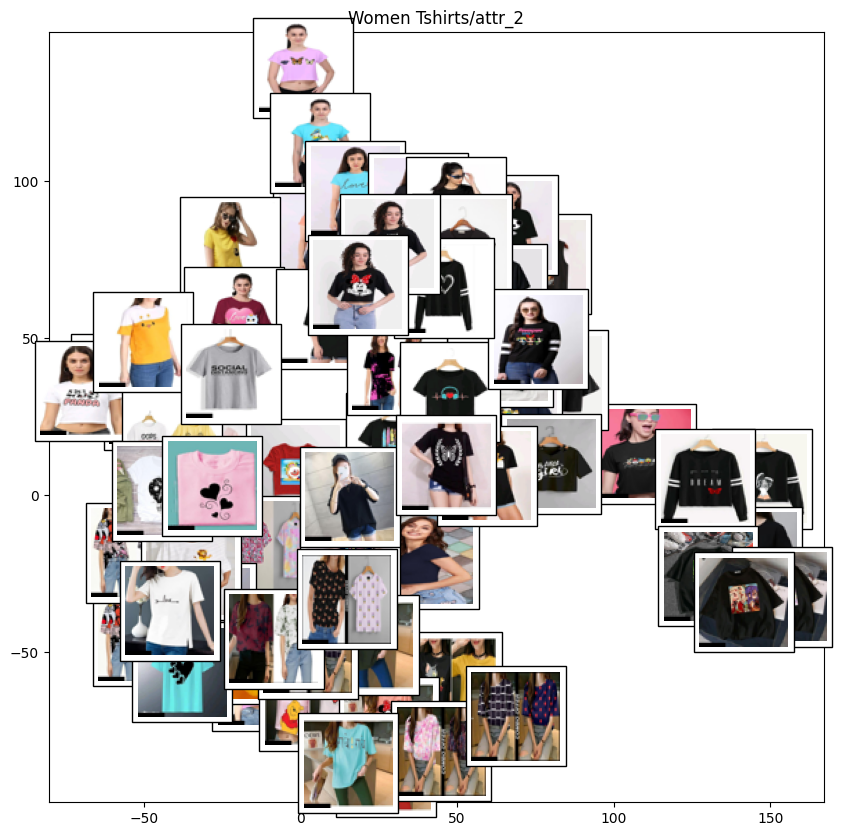

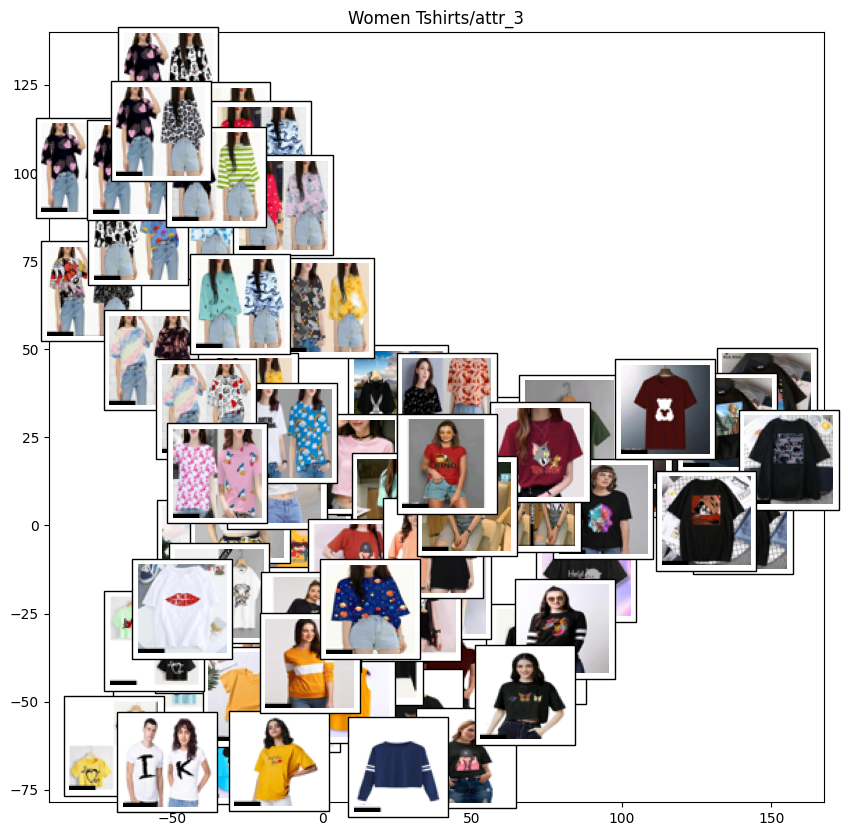

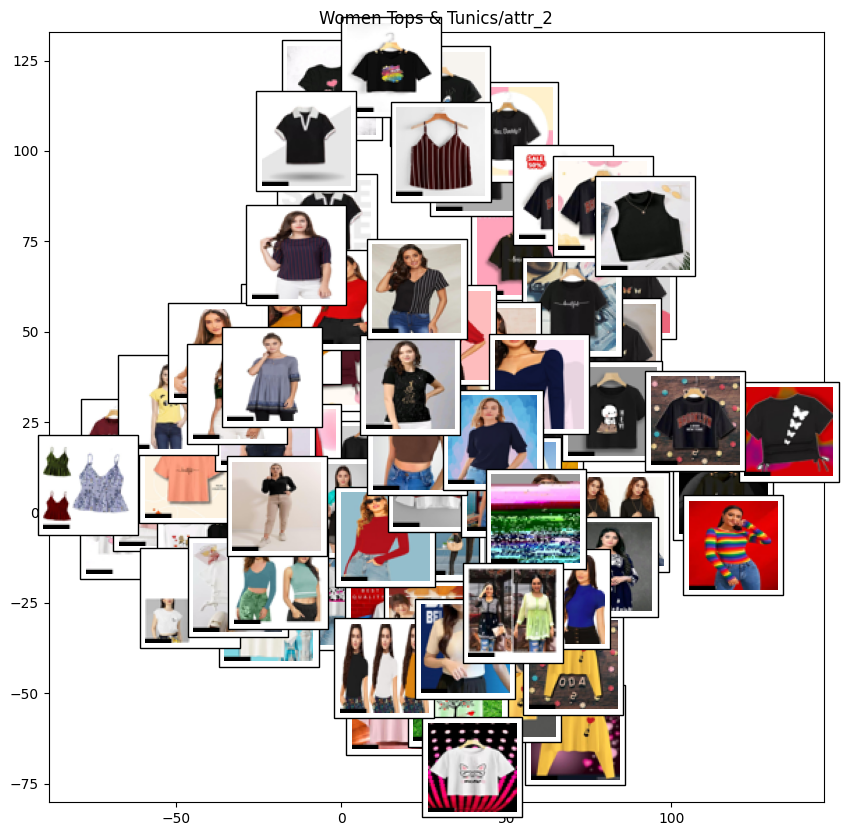

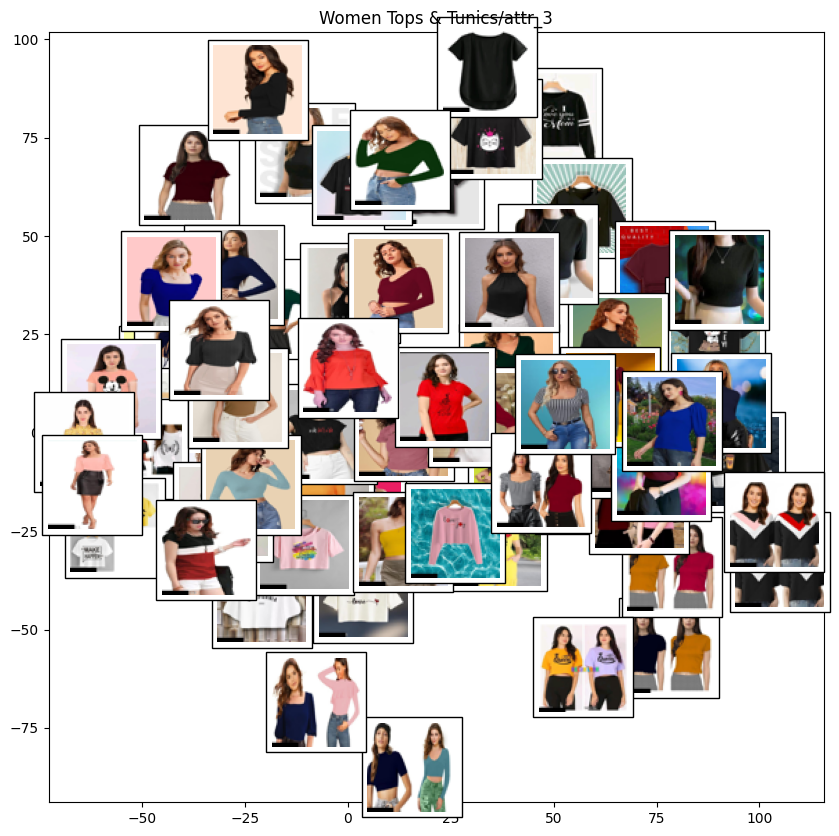

In [46]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from PIL import Image
import numpy as np
from matplotlib import offsetbox

def visualize_embeddings(embedding_data, dimensionality_reduction_model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    embeddings = dimensionality_reduction_model.fit_transform(embedding_data)
    ax.plot(embeddings[:, 0], embeddings[:, 1], '.k')

    if images is not None:
        min_dist_sq = (thumb_frac * max(embeddings.max(0) - embeddings.min(0))) ** 2
        shown_images = np.array([2 * embeddings.max(0)])
        for i in range(embeddings.shape[0]):
            dist = np.sum((embeddings[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_sq:
                continue
            shown_images = np.vstack([shown_images, embeddings[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      embeddings[i])
            ax.add_artist(imagebox)


for sampled_df, (category, column) in zip(sampled_dfs, basket):
    images_data = []
    images_resized = []
    image_ids = []

    for _, item in sampled_df.iterrows():
        image_id = item['id']
        formatted_id = f"{int(image_id):06d}"
        image_path = f"/kaggle/working/visual-taxonomy/train_images/{formatted_id}.jpg"

        image_array = load_and_preprocess_image(image_path)
        if image_array is not None:
            images_data.append(image_array)
            resized_image = resize_image(image_id, image_directory='/kaggle/working/visual-taxonomy/train_images')
            if resized_image:
                images_resized.append(resized_image)
            else:
              print("Could not resize image")
              #Handle the case gracefully, e.g. skip this sample
              continue


    if not images_data:
        print(f"No valid images found for category '{category}', column '{column}'. Skipping...")
        continue

    images_data = np.array(images_data)

    fig, ax = plt.subplots(figsize=(10, 10))
    visualize_embeddings(images_data, Isomap(n_components=2), images=images_resized, ax=ax, thumb_frac=0.05, cmap='gray')
    plt.title(f"{category}/{column}")
    plt.show()